In [1]:
import h5py
import tensorflow as tf

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# Print the summary of the loaded model
loaded_model.summary()

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image
plot_model(loaded_model, to_file='model_flow_chart.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
import tensorflow as tf

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# Save the summary to a text file
with open('model_summary.txt', 'w') as f:
    loaded_model.summary(print_fn=lambda x: f.write(x + '\n'))

# Convert the text file to an image
from PIL import Image, ImageDraw, ImageFont

# Open the text file
with open('model_summary.txt', 'r') as f:
    text = f.readlines()

# Set up the image
image_width = 800
image_height = 600
background_color = (255, 255, 255)
font_color = (0, 0, 0)
font_path = "arial.ttf"  # You may need to change the font path
font_size = 16

# Create the image
image = Image.new('RGB', (image_width, image_height), background_color)
draw = ImageDraw.Draw(image)

# Load a font
font = ImageFont.truetype(font_path, font_size)

# Add text to the image
y_position = 10
for line in text:
    draw.text((10, y_position), line.strip(), font=font, fill=font_color)
    y_position += font_size

# Save the image
image.save('model_summary.png')


In [ ]:
import tensorflow as tf

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# Check if any layer has pretrained weights
pretrained_layers = False
for layer in loaded_model.layers:
    if hasattr(layer, 'weights') and layer.weights:
        pretrained_layers = True
        break

if pretrained_layers:
    print("The loaded model contains pretrained weights.")
else:
    print("The loaded model does not contain pretrained weights.")



The loaded model contains pretrained weights.


In [ ]:
import tensorflow as tf

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# View the weights of each layer
for layer in loaded_model.layers:
    if hasattr(layer, 'weights') and layer.weights:
        print(f"Layer: {layer.name}")
        for weight in layer.weights:
            print(f"  {weight.name}: {weight.shape}")
            # If you want to view the actual values of the weights, uncomment the following line
            # print(weight.numpy())


Layer: conv2d
  conv2d/kernel:0: (3, 3, 1, 64)
  conv2d/bias:0: (64,)
Layer: batch_normalization
  batch_normalization/gamma:0: (64,)
  batch_normalization/beta:0: (64,)
  batch_normalization/moving_mean:0: (64,)
  batch_normalization/moving_variance:0: (64,)
Layer: conv2d_1
  conv2d_1/kernel:0: (5, 5, 64, 128)
  conv2d_1/bias:0: (128,)
Layer: batch_normalization_1
  batch_normalization_1/gamma:0: (128,)
  batch_normalization_1/beta:0: (128,)
  batch_normalization_1/moving_mean:0: (128,)
  batch_normalization_1/moving_variance:0: (128,)
Layer: conv2d_2
  conv2d_2/kernel:0: (3, 3, 128, 512)
  conv2d_2/bias:0: (512,)
Layer: batch_normalization_2
  batch_normalization_2/gamma:0: (512,)
  batch_normalization_2/beta:0: (512,)
  batch_normalization_2/moving_mean:0: (512,)
  batch_normalization_2/moving_variance:0: (512,)
Layer: conv2d_3
  conv2d_3/kernel:0: (3, 3, 512, 512)
  conv2d_3/bias:0: (512,)
Layer: batch_normalization_3
  batch_normalization_3/gamma:0: (512,)
  batch_normalization_3/

C:\Users\tsgte\AppData\Local\Temp\ipykernel_10116\4015960244.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


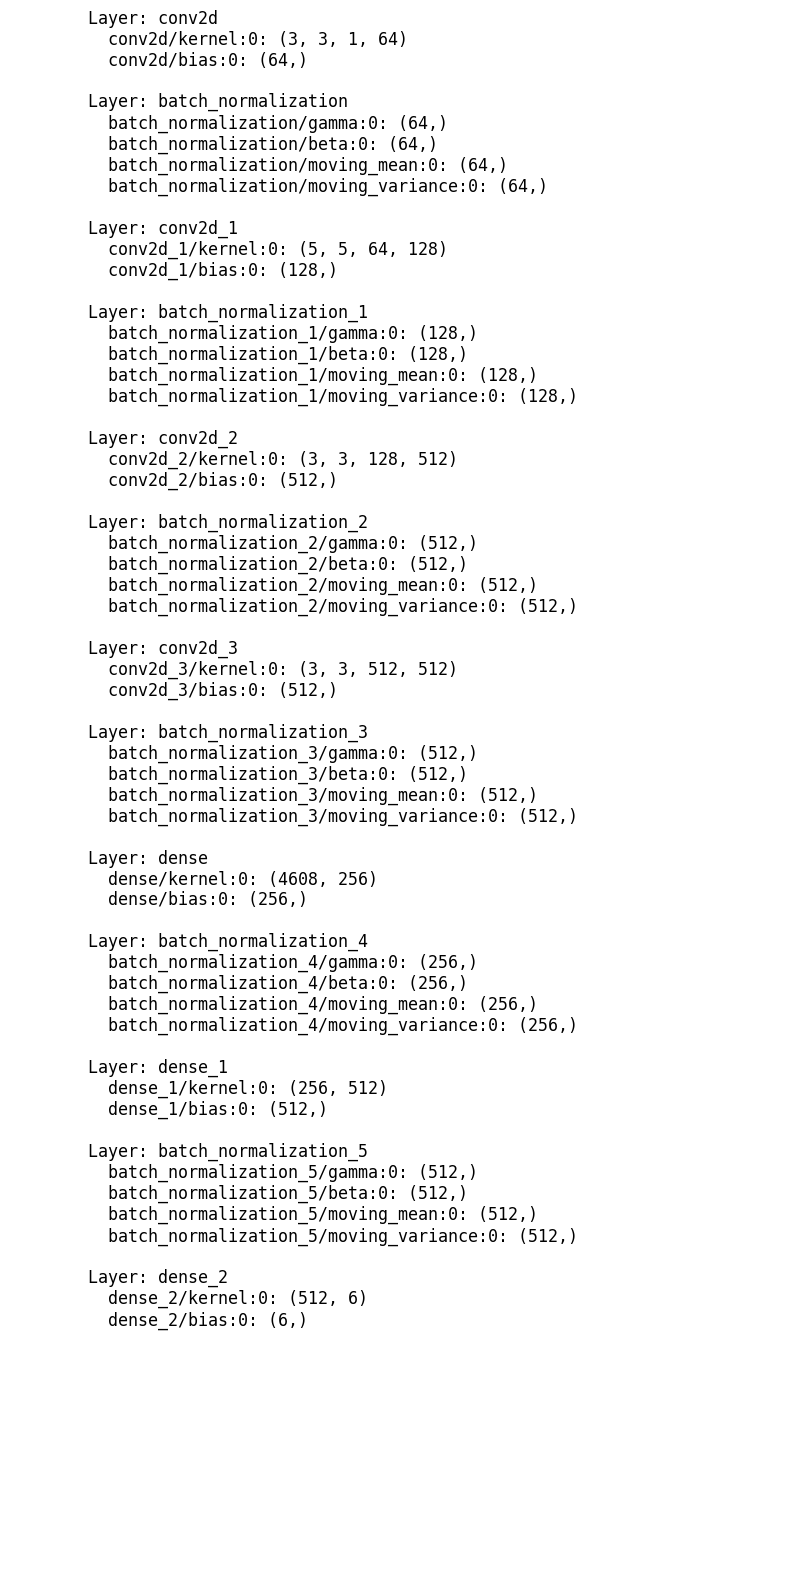

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# Capture the weights information
weights_info = []
for layer in loaded_model.layers:
    if hasattr(layer, 'weights') and layer.weights:
        layer_info = f"Layer: {layer.name}\n"
        for weight in layer.weights:
            layer_info += f"  {weight.name}: {weight.shape}\n"
        weights_info.append(layer_info)

# Create a PNG image
plt.figure(figsize=(10, 6))
plt.text(0.1, 0.5, '\n'.join(weights_info), fontsize=12, family='monospace')
plt.axis('off')
plt.tight_layout()

# Save the image
plt.savefig('model_weights_info.png', dpi=300, bbox_inches='tight')


In [2]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# Load your validation dataset (assuming you have it prepared)
# X_val, y_val = ...

# Make predictions on the validation dataset
predictions = loaded_model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy and loss
loss, accuracy = loaded_model.evaluate(X_val, y_val, verbose=0)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

# Generate classification report
target_names = ['class_1', 'class_2', ...]  # specify your class names
print(classification_report(np.argmax(y_val, axis=1), predicted_labels, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_val, axis=1), predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate validation accuracy
validation_accuracy = np.sum(np.argmax(y_val, axis=1) == predicted_labels) / len(y_val)
print(f'Validation Accuracy: {validation_accuracy}')


NameError: name 'X_val' is not defined

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the entire model (architecture + weights)
loaded_model = tf.keras.models.load_model('fer.h5')

# Load your validation dataset (assuming you have it prepared)
# X_val, y_val = ...

# Make predictions on the validation dataset
predictions = loaded_model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy and loss
loss, accuracy = loaded_model.evaluate(X_val, y_val, verbose=0)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

# Generate classification report
target_names = ['class_1', 'class_2', ...]  # specify your class names
classification_rep = classification_report(np.argmax(y_val, axis=1), predicted_labels, target_names=target_names)
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_val, axis=1), predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate validation accuracy
validation_accuracy = np.sum(np.argmax(y_val, axis=1) == predicted_labels) / len(y_val)
print(f'Validation Accuracy: {validation_accuracy}')

# Save accuracy as PNG
plt.figure()
plt.bar(['Accuracy'], [accuracy])
plt.title('Accuracy')
plt.savefig('accuracy.png')

# Save classification report as PNG
plt.figure(figsize=(10, 6))
plt.text(0.1, 0.5, classification_rep, fontsize=12, family='monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('classification_report.png')

# Save confusion matrix as PNG
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

# Save validation accuracy as PNG
plt.figure()
plt.bar(['Validation Accuracy'], [validation_accuracy])
plt.title('Validation Accuracy')
plt.savefig('validation_accuracy.png')
